In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = mouse_metadata.merge(study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Checking the number of mice
Nu_mice = mouse_results_df["Mouse ID"].nunique()

print(f"There are {Nu_mice} mice included in the study.")

There are 249 mice included in the study.


In [3]:
#Finding and displaying the duplicated data, based on Mouse ID and Timepoint
dupl_mouse = mouse_results_df[mouse_results_df.duplicated(subset = ["Mouse ID", "Timepoint"])]
dupl_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#Displaying all the data for the duplicate Mouse ID
mouse_results_df.loc[mouse_results_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Clean the data frame by dropping the Mouse ID that has duplicated entries
mouse_results_cl = mouse_results_df[mouse_results_df["Mouse ID"] != "g989"]
mouse_results_cl.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#Display the number of mice in the cleaned data frame (the number has gone from 249 to 248)
Nu_mice_cl = mouse_results_cl["Mouse ID"].nunique()
print(f"There are {Nu_mice_cl} mice in the cleaned data set.")

There are 248 mice in the cleaned data set.


## Summary Statistics

In [7]:
#Group the Tumor Volume (mm3) data by Drug Regimen
regimen_results_df = mouse_results_cl.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

In [8]:
#Summary statistics using scipy

mean_scipy = regimen_results_df.mean()

median_scipy = regimen_results_df.median()

var_scipy = regimen_results_df.var()

std_scipy = regimen_results_df.std()

sem_scipy = regimen_results_df.sem()

sum_stat_scipy = pd.DataFrame({"Mean": mean_scipy,
                                  "Median": median_scipy,
                                  "Variance": var_scipy,
                                  "Std. Dev": std_scipy,
                                  "SEM": sem_scipy})
sum_stat_scipy

,Mean,Median,Variance,Std. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Summary statistics using aggregation
sum_stats_agg = regimen_results_df.agg(["mean", "median", "var", "std", "sem"])

sum_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#Check the number of entries
unique_info = mouse_results_cl.count()
unique_info

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Bar and Pie Charts

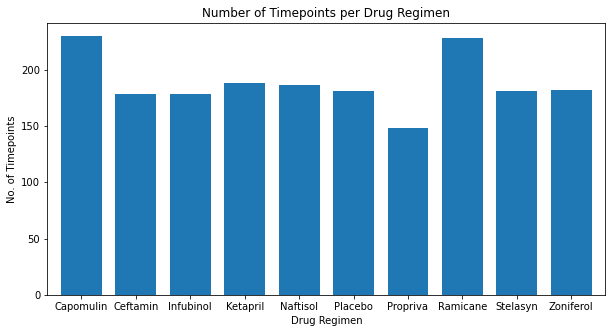

In [11]:
#Filter the data frame to only the columns needed
regimen_and_timepoint = mouse_results_cl[["Drug Regimen", "Timepoint"]]

#groupby and count to calculate the number of timepoint entries per drug regimen
regimen_and_timepoint = regimen_and_timepoint.groupby(["Drug Regimen"]).count()

#Formatting info for Dataframe.plot() bar plot
title = "Number of Timepoints per Drug Regimen"
xlabel = "Drug Regimen"
ylabel = "No. of Timepoints"

# Use DataFrame.plot() to create a bar chart
regimen_and_timepoint.plot(kind = "bar", figsize = (10,5), rot = 0, title = title, xlabel = xlabel, ylabel = ylabel, width = .75, legend = None);

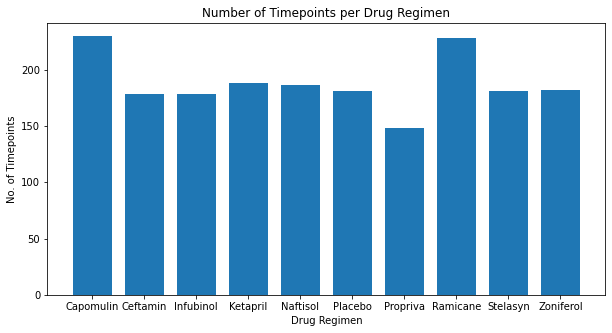

In [12]:
#Set x-axis format information
x_axis = np.arange(len(regimen_and_timepoint))
x_names = regimen_and_timepoint.index.unique()
tick_locations = [value for value in x_axis]

#Create empty chart with Matplotlib
plt.figure(figsize=(10, 5))

#Add data and formatting to bar plot
plt.bar(x_axis, regimen_and_timepoint["Timepoint"], align="center", width = .75)
plt.xticks(tick_locations, x_names, rotation="0")
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints");

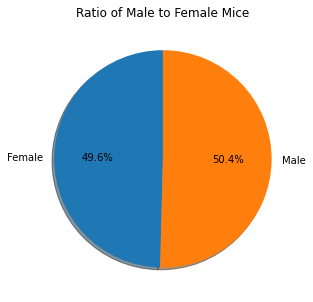

In [13]:
#Filter the data frame to only the columns needed
sex_of_mice = mouse_results_cl[["Mouse ID", "Sex"]]

#drop_duplicates to only count each mouse once, groupby and count to calculate the total number of each sex
sex_of_mice = sex_of_mice.drop_duplicates()
sex_of_mice = sex_of_mice.groupby(["Sex"]).count()

#Formatting info for Dataframe.plot() bar plot
title = "Ratio of Male to Female Mice"
ylabel = ""

# Use DataFrame.plot() to create a pie chart
sex_of_mice.plot(kind = "pie", y = "Mouse ID", shadow = True, startangle=90, figsize=(5,5), autopct='%1.1f%%', title = title, ylabel = ylabel, legend = None);


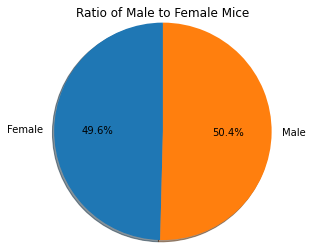

In [14]:
#Setting up pie chart information
fe_male = sex_of_mice.index.unique()
total = sex_of_mice["Mouse ID"]
x_axis = np.arange(0, len(sex_of_mice))

#Formatting
colors = ['#1f77b4', '#ff7f0e'] #found these colors on Stack Overflow, to match the default two used in the pie chart above
plt.title("Ratio of Male to Female Mice")

#Create the pie plot
plt.pie(total, labels=fe_male, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90, radius = 1.25);

## Quartiles, Outliers, and Boxplots

In [15]:
#Create data frame that contains only mouse ID and timepoint, then groupby mouse ID
ID_and_timepoint = mouse_results_cl[["Mouse ID", "Timepoint"]]
ID_and_timepoint = ID_and_timepoint.groupby(["Mouse ID"])

#Find the last timepoint
final_timepoint = ID_and_timepoint["Timepoint"].max()

#Merge in the rest of the data
final_volume_all = pd.merge(final_timepoint, mouse_results_cl, how = "left", on = ["Mouse ID", "Timepoint"])

#Create a list of the Drug Regimens to be studied further, and filter the data frame to match
top_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

final_volume_t4 = final_volume_all[final_volume_all["Drug Regimen"].isin(top_list)]

#Display data frame containing final Tumor Volume (mm3)
final_volume_t4.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [31]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
practise_drug = final_volume_t4[["Tumor Volume (mm3)"]]

quartiles = practise_drug.quantile([0.25, 0.5, 0.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

quartiles

,Tumor Volume (mm3)
0.25,37.187744
0.50,45.000000
0.75,59.930262


In [ ]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and 
#highlight any potential outliers in the plot by changing their color and style.

## Line and Scatter Plots

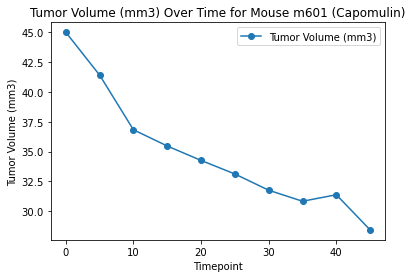

In [122]:
#Choose the drug regimen to choose a random mouse from
specific_drug = "Capomulin"

#Create list of mouse IDs for mice treated with a specific drug
specific_drug_data = mouse_results_cl[mouse_results_cl["Drug Regimen"] == specific_drug]
ID_specific_drug = specific_drug_data.drop_duplicates(["Mouse ID"])

#Choose a random mouse ID
random_mouse = ID_specific_drug["Mouse ID"].sample()

#Get tumor data for random mouse
rand_mouse_data = specific_drug_data[specific_drug_data["Mouse ID"] == random_mouse.item()]

#Create line plot information
title = f"Tumor Volume (mm3) Over Time for Mouse {random_mouse.item()} ({specific_drug})"
ylabel = "Tumor Volume (mm3)"

#Create line plot
rand_mouse_data.plot(x = "Timepoint", y = "Tumor Volume (mm3)", title = title, ylabel = ylabel, style = "o-");

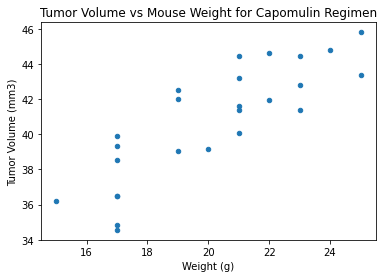

In [144]:
#Choose the drug regimen to choose a random mouse from
specific_drug = "Capomulin"

#Create a data frame with only mice treated with a specific drug, groupby mouse ID
specific_drug_data = mouse_results_cl[mouse_results_cl["Drug Regimen"] == specific_drug]
drug_data_grouped = specific_drug_data.groupby(["Mouse ID"])

#Find the mean
data_mean = drug_data_grouped.mean()

#Create scatter plot information
title = f"Tumor Volume vs Mouse Weight for {specific_drug} Regimen"

#Create and display scatter plot
data_mean.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", title = title);

## Correlation and Regression

The correlation between the two factors is 0.84


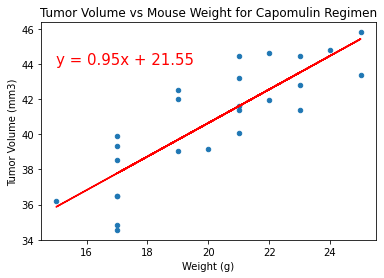

In [178]:
x_values = data_mean["Weight (g)"]
y_values = data_mean["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print out the correlation value
print(f"The correlation between the two factors is {round(rvalue,2)}")

#Plot orginal scatter plot, title is the same as the previous section
data_mean.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", title = title);

#Add plot of linear regression model
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (15, 44), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()